In [16]:
import fitz  
import re
from collections import defaultdict
import matplotlib.pyplot as plt

import sys
sys.path.append('../common/')
from common import *

file_path = '2020-AL-GEN.pdf'
doc = fitz.open(file_path)


text = ''
for page in doc:
    text += page.get_text()

text[:1000]  


'2020 RESULTS: GENERAL CERTIFICATE OF EDUCATION EXAMINATION - ADVANCED LEVEL\nAUTHENTIC GCE RESULTS\nCentre No:  11001 BUEA EXTERNAL  \nRegist: 240, Sat for 2 or more Subjects: 222, Passed : 109\n% Passed : 49.10, Sanctioned : 2\nResults of Successful Candidates In Order Of Merit\nPassed In 5 Subjects: 2\nNJOME MUNSHE MOKAKE ECO-C,ENG-C,HIS-B,LIT-D,PHI-A\n(1)\nMOTOKO NICAISE ILONDI ECO-E,ENG-D,HIS-D,PHI-E,REL-C\n(2)\nPassed In 4 Subjects: 10\nNJAMBE SALLY NANYONGO ENG-A,FRE-A,HIS-B,ICT-A\n(1)\nLOURE EKAH NJI ECO-B,ENG-B,HIS-B,LIT-B\n(2)\nNFOR MONDE HARMLET ECO-E,ENG-C,GEO-A,HIS-C\n(3)\nTABI BAWAH EFFETI BLANDINE ENG-D,HIS-C,PHI-C,REL-D\n(4)\nJABEA LAUREN EWELI LITUTE ENG-E,HIS-C,LIT-E,PHI-B\n(5)\nABE ELIZABETH OJONG ECO-E,HIS-C,PHI-E,REL-C\n(6)\nEBAI AMAH THALIA EKPENG BIO-E,CHE-E,FSN-A,ICT-E\n(7)\nOJONG SUSAN AGBOR ENG-D,HIS-E,PHI-D,REL-D\n(8)\nMBANNYI ONERLA FUNGAMBI ECO-E,ENG-D,GEO-E,HIS-D\n(9)\nMENKEM JULES NASAKO ECO-E,ENG-E,HIS-D,PHI-E\n(10)\nPassed In 3 Subjects: 32\nSALI JAMES 

In [17]:
pattern = re.compile(r'([A-Z\s]+)\s*([A-Z]{3,5}-[A-E](?:,\s*[A-Z]{3,5}-[A-E])*)\s*\(\d+\)')

In [18]:
candidates = pattern.findall(text)
dict_candidates = { candidate[0].strip(): Record(candidate) for candidate in candidates }
grade_distribution = defaultdict(GradeDist)
# Summary of candidates
print(f"Total number of candidates: {len(dict_candidates)}")

Total number of candidates: 33777


In [19]:
def top_n_percent(grade_distribution, grade):
    total_candidates = len(dict_candidates)
    candidates_considered = 0
    while grade <= 25:
        candidates_considered += grade_distribution[grade].count
        grade += 1
    return candidates_considered / (total_candidates*100/70) * 100 # accounting for 70% failure rate

In [20]:


for ind, candidate in enumerate(dict_candidates):
    if ind == 10:
        break
    print(candidate, dict_candidates[candidate])

NJOME MUNSHE MOKAKE GPA: 3.40 | 17 points -> {'ECO': 'C', 'ENG': 'C', 'HIS': 'B', 'LIT': 'D', 'PHI': 'A'}
MOTOKO NICAISE ILONDI GPA: 1.80 | 9 points -> {'ECO': 'E', 'ENG': 'D', 'HIS': 'D', 'PHI': 'E', 'REL': 'C'}
NJAMBE SALLY NANYONGO GPA: 4.75 | 19 points -> {'ENG': 'A', 'FRE': 'A', 'HIS': 'B', 'ICT': 'A'}
LOURE EKAH NJI GPA: 4.00 | 16 points -> {'ECO': 'B', 'ENG': 'B', 'HIS': 'B', 'LIT': 'B'}
NFOR MONDE HARMLET GPA: 3.00 | 12 points -> {'ECO': 'E', 'ENG': 'C', 'GEO': 'A', 'HIS': 'C'}
TABI BAWAH EFFETI BLANDINE GPA: 2.50 | 10 points -> {'ENG': 'D', 'HIS': 'C', 'PHI': 'C', 'REL': 'D'}
JABEA LAUREN EWELI LITUTE GPA: 2.25 | 9 points -> {'ENG': 'E', 'HIS': 'C', 'LIT': 'E', 'PHI': 'B'}
ABE ELIZABETH OJONG GPA: 2.00 | 8 points -> {'ECO': 'E', 'HIS': 'C', 'PHI': 'E', 'REL': 'C'}
EBAI AMAH THALIA EKPENG GPA: 2.00 | 8 points -> {'BIO': 'E', 'CHE': 'E', 'FSN': 'A', 'ICT': 'E'}
OJONG SUSAN AGBOR GPA: 1.75 | 7 points -> {'ENG': 'D', 'HIS': 'E', 'PHI': 'D', 'REL': 'D'}


<BarContainer object of 24 artists>

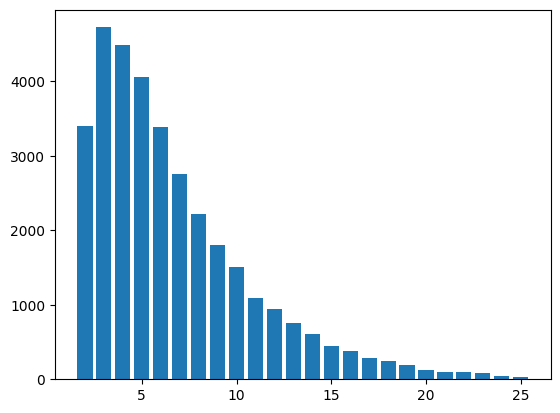

In [21]:
grade_distribution = defaultdict(GradeDist)
for candidate in dict_candidates:
    grade_distribution[dict_candidates[candidate].points].add(candidate)

plt.bar(grade_distribution.keys(), [grade_distribution[key].count for key in grade_distribution.keys()])

In [22]:
print("Points \t: \tNumber of candidates \t: \tTop n% of candidates")
print("------ \t: \t--------------------- \t: \t--------------------")
for key in sorted(grade_distribution.keys(), reverse=True):
    print(f"{key}\t: \t\t{grade_distribution[key]} \t\t: \t\t{top_n_percent(grade_distribution, key):.2f}%")

Points 	: 	Number of candidates 	: 	Top n% of candidates
------ 	: 	--------------------- 	: 	--------------------
25	: 		32 		: 		0.07%
24	: 		45 		: 		0.16%
23	: 		87 		: 		0.34%
22	: 		93 		: 		0.53%
21	: 		97 		: 		0.73%
20	: 		126 		: 		0.99%
19	: 		191 		: 		1.39%
18	: 		248 		: 		1.90%
17	: 		287 		: 		2.50%
16	: 		383 		: 		3.29%
15	: 		444 		: 		4.21%
14	: 		610 		: 		5.48%
13	: 		751 		: 		7.03%
12	: 		948 		: 		9.00%
11	: 		1090 		: 		11.26%
10	: 		1507 		: 		14.38%
9	: 		1806 		: 		18.12%
8	: 		2219 		: 		22.72%
7	: 		2761 		: 		28.44%
6	: 		3385 		: 		35.46%
5	: 		4052 		: 		43.86%
4	: 		4488 		: 		53.16%
3	: 		4726 		: 		62.95%
2	: 		3401 		: 		70.00%


In [23]:
## All 25 points candidates

print(f"Total {grade_distribution[25].count} candidates with 25 points")
print(f"Candidates with 25 points(top {top_n_percent(grade_distribution, 25):.2f}%):")
for candidate in grade_distribution[25].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 32 candidates with 25 points
Candidates with 25 points(top 0.07%):
	 NDOUMBE MALIKE EVRADA AYMARD S 	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMN': 'A'}
	 TAKU PERIVET ENOW              	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMN': 'A'}
	 YEDE EDWY AUGUSTE              	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMN': 'A'}
	 AWAH NKWENTI MICHEAL           	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMN': 'A'}
	 EVARISTUS SORFOR FOMUSO        	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'PHY': 'A', 'PMN': 'A'}
	 YENYI WILKINSON NKONTCHU       	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'CSC': 'A', 'PHY': 'A', 'PMN': 'A'}
	 FUBE AZINWI MILLAH             	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'A', 'PMN': 'A'}
	 NGOUNE ANTONY BRADLEY          	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 

In [24]:
## All 24 points candidates

print(f"Total {grade_distribution[24].count} candidates with 24 points")
print(f"Candidates with 24 points(top {top_n_percent(grade_distribution, 24):.2f}%):")
for candidate in grade_distribution[24].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 45 candidates with 24 points
Candidates with 24 points(top 0.16%):
	 ELONE TATAW JOSEPH             	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'ICT': 'A', 'PHY': 'A', 'PMN': 'B'}
	 FOADIENG FOKAM NELSON KEVIN    	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'A', 'PHY': 'B', 'PMN': 'A'}
	 MBIYDZENYUY BINIRLA AGABETUS   	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'B', 'PHY': 'A', 'PMN': 'A'}
	 KENKOH JANICE KECHIA           	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'B', 'PHY': 'A', 'PMN': 'A'}
	 PIGHIEBWOH NOKA GILDAS         	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'ICT': 'A', 'PHY': 'A', 'PMN': 'B'}
	 LONGATIE FAVOUR FRU            	 GPA: 4.80 | 24 points -> {'ECO': 'A', 'GEO': 'A', 'PHI': 'A', 'PMS': 'A', 'REL': 'B'}
	 JASON YOUMBI SHOUASHA          	 GPA: 4.80 | 24 points -> {'CHE': 'A', 'CSC': 'A', 'FMA': 'B', 'PHY': 'A', 'PMN': 'A'}
	 NWALAHNJIE ANYE AKUMAWAH       	 GPA: 4.80 | 24 points -> {'CHE': 'A', 'CSC': 

In [25]:
## All 23 points candidates

print(f"Total {grade_distribution[23].count} candidates with 23 points")
print(f"Candidates with 23 points(top {top_n_percent(grade_distribution, 23):.2f}%):")
for candidate in grade_distribution[23].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 87 candidates with 23 points
Candidates with 23 points(top 0.34%):
	 TEJEUTCHA KENGNI LEONEL WILFRI 	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'B', 'PHY': 'B', 'PMN': 'A'}
	 CHE DANIEL MIYANWI             	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'C', 'PHY': 'A', 'PMN': 'A'}
	 SAMA MOSES NTSANTI             	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'B', 'ICT': 'B', 'PHY': 'A', 'PMN': 'A'}
	 NGONG MARVIN KANG              	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'B', 'PHY': 'A', 'PMN': 'A'}
	 TEISEH MARIAM GZIPOH           	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'B', 'PHY': 'A', 'PMN': 'A'}
	 NKENGFUA FUALEFAH LOUIS        	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'B', 'PHY': 'B', 'PMN': 'A'}
	 NDIKA OPEH LIWIYEH             	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'A', 'ICT': 'A', 'PHY': 'C', 'PMS': 'A'}
	 NJOUNKENG DAIZE MERVILLE NKEOB 	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 

In [26]:
## All 22 points candidates

print(f"Total {grade_distribution[22].count} candidates with 22 points")
print(f"Candidates with 22 points(top {top_n_percent(grade_distribution, 22):.2f}%):")
for candidate in grade_distribution[22].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 93 candidates with 22 points
Candidates with 22 points(top 0.53%):
	 TITA AFUMBOM SAMUEL            	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'B', 'PHY': 'B', 'PMN': 'A'}
	 ABDOUL MALIK YUSSUFU OUSMANOU  	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'B', 'PHY': 'C', 'PMN': 'A'}
	 MBONGIH JESLY SANGWA           	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'B', 'PHY': 'B', 'PMN': 'A'}
	 PINLONG SELOBIE IGOR           	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'B', 'PHY': 'B', 'PMN': 'A'}
	 MELLE DANIEL EKANE             	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE': 'B', 'CSC': 'C', 'PHY': 'A', 'PMN': 'A'}
	 CHIDI MOSES TAZOH JUNIOR       	 GPA: 4.40 | 22 points -> {'ECO': 'C', 'GEO': 'A', 'HIS': 'B', 'PHI': 'A', 'REL': 'A'}
	 TANYU BRANDON SOSAH            	 GPA: 4.40 | 22 points -> {'CHE': 'A', 'CSC': 'B', 'FMA': 'B', 'PHY': 'B', 'PMN': 'A'}
	 FONDIKUM FAVOUR AKWANYWI       	 GPA: 4.40 | 22 points -> {'ECO': 'B', 'HIS': 

In [27]:
## All 21 points candidates

print(f"Total {grade_distribution[21].count} candidates with 21 points")
print(f"Candidates with 21 points(top {top_n_percent(grade_distribution, 21):.2f}%):")
for candidate in grade_distribution[21].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 97 candidates with 21 points
Candidates with 21 points(top 0.73%):
	 FORGHAB KLOUVERT NGOHNGIM      	 GPA: 4.20 | 21 points -> {'BIO': 'A', 'CHE': 'B', 'ICT': 'C', 'PHY': 'B', 'PMN': 'A'}
	 TCHANTCHOU NJANTOU HENRI       	 GPA: 4.20 | 21 points -> {'CHE': 'B', 'CSC': 'C', 'FMA': 'A', 'PHY': 'B', 'PMN': 'A'}
	 NCHINDA NELLY SANDRA ADAMU     	 GPA: 4.20 | 21 points -> {'ECO': 'A', 'ENG': 'C', 'GEO': 'A', 'ICT': 'B', 'PMS': 'B'}
	 LIKEUFACK WILSON CHRIST        	 GPA: 4.20 | 21 points -> {'CHE': 'B', 'CSC': 'C', 'FMA': 'A', 'PHY': 'B', 'PMN': 'A'}
	 TAMBE SALOME NTOH              	 GPA: 4.20 | 21 points -> {'CHE': 'A', 'CSC': 'B', 'FMA': 'C', 'PHY': 'B', 'PMN': 'A'}
	 AYUK MARU JOB                  	 GPA: 4.20 | 21 points -> {'BIO': 'B', 'CHE': 'A', 'FMA': 'B', 'PHY': 'C', 'PMN': 'A'}
	 ALENUI ROVIS MBAH              	 GPA: 4.20 | 21 points -> {'CHE': 'B', 'CSC': 'B', 'FMA': 'C', 'PHY': 'A', 'PMN': 'A'}
	 AKWANGA EVELYN NJUKANG         	 GPA: 4.20 | 21 points -> {'BIO': 'A', 'CHE': 

In [28]:
## All 20 points candidates

print(f"Total {grade_distribution[20].count} candidates with 20 points")
print(f"Candidates with 20 points(top {top_n_percent(grade_distribution, 20):.2f}%):")
for candidate in grade_distribution[20].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 126 candidates with 20 points
Candidates with 20 points(top 0.99%):
	 H MARY IMMACULATE              	 GPA: 4.00 | 20 points -> {'BIO': 'A', 'CHE': 'B', 'FSN': 'A', 'PHY': 'C', 'PMN': 'C'}
	 ACHALE EBOT OMA                	 GPA: 4.00 | 20 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'C', 'PHY': 'B', 'PMN': 'B'}
	 NDIP                           	 GPA: 4.00 | 20 points -> {'ECO': 'B', 'ENG': 'B', 'GEO': 'A', 'ICT': 'C', 'PMS': 'B'}
	 ASONGNE BENARD LELINU          	 GPA: 4.00 | 20 points -> {'ECO': 'D', 'GEO': 'A', 'HIS': 'B', 'PHI': 'A', 'REL': 'B'}
	 CLAIRE NYIFETETOH              	 GPA: 4.00 | 20 points -> {'ECO': 'B', 'ENG': 'B', 'HIS': 'A', 'LIT': 'C', 'REL': 'B'}
	 NAA SPERRANZA NGU              	 GPA: 4.00 | 20 points -> {'BIO': 'A', 'CHE': 'B', 'FSN': 'A', 'PHY': 'D', 'PMS': 'B'}
	 NGWILEFAC SHARON FONCHA        	 GPA: 4.00 | 20 points -> {'ECO': 'B', 'ENG': 'C', 'HIS': 'B', 'LIT': 'B', 'PHI': 'A'}
	 SAMA MERNGWIH ALBRIGHT         	 GPA: 4.00 | 20 points -> {'BIO': 'A', 'CHE':

In [29]:
## All 19 points candidates

print(f"Total {grade_distribution[19].count} candidates with 19 points")
print(f"Candidates with 19 points(top {top_n_percent(grade_distribution, 19):.2f}%):")
for candidate in grade_distribution[19].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 191 candidates with 19 points
Candidates with 19 points(top 1.39%):
	 NJAMBE SALLY NANYONGO          	 GPA: 4.75 | 19 points -> {'ENG': 'A', 'FRE': 'A', 'HIS': 'B', 'ICT': 'A'}
	 NOUTSA KOBIWO MERVEILLE NATHAN 	 GPA: 3.80 | 19 points -> {'BIO': 'A', 'CHE': 'B', 'FMA': 'D', 'PHY': 'C', 'PMN': 'A'}
	 NGWA EMMANUEL FUH              	 GPA: 3.80 | 19 points -> {'CHE': 'B', 'CSC': 'D', 'FMA': 'C', 'PHY': 'A', 'PMN': 'A'}
	 BERYL ACHIAMBO FUAMAZEH        	 GPA: 3.80 | 19 points -> {'BIO': 'A', 'CHE': 'A', 'FMA': 'D', 'PHY': 'C', 'PMN': 'B'}
	 LOBGA DOBGA FOMBOH JULIUS      	 GPA: 3.80 | 19 points -> {'CHE': 'B', 'CSC': 'A', 'FMA': 'D', 'PHY': 'B', 'PMN': 'B'}
	 ETAH CLINTON EYONG             	 GPA: 3.80 | 19 points -> {'CHE': 'C', 'CSC': 'B', 'FMA': 'C', 'PHY': 'B', 'PMN': 'A'}
	 GLENN ENOW NTANKEU             	 GPA: 3.80 | 19 points -> {'BIO': 'B', 'CHE': 'A', 'PHY': 'D', 'PMN': 'B', 'REL': 'B'}
	 NEBA ROSEMARIE SIRRI           	 GPA: 3.80 | 19 points -> {'BIO': 'A', 'CHE': 'C', 'ICT':